In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

KeyboardInterrupt: 

In [111]:
df_train = pd.read_csv('sentiment_data_combine.csv')

In [90]:
df_train.head()

organizations                                               text  \
0            []  I was satisfied with some things but I was ver...   
1            []  will not purchase these briefs again. the tape...   
2            []  In your page you said "same day delivery" but ...   
3            []  On March 4th I ordered a man's ring size 10 sh...   
4            []  product did not allow machine to print!\nI cha...   

          author                        crawled persons external_links  \
0           Jill  2017-02-13T11:26:26.546+02:00      []             []   
1        Gilbert  2017-02-19T01:11:12.192+02:00      []             []   
2  Arturo Garcia  2017-02-21T06:58:07.455+02:00      []             []   
3          Donna  2017-03-25T08:43:24.491+03:00      []             []   
4    Tony Wilson  2017-03-19T04:19:02.375+02:00      []             []   

   highlightText  highlightTitle language locations  ...   \
0            NaN             NaN  english        []  ...    
1            NaN             NaN  english        []  ...    
2            NaN             NaN  english        []  ...    
3            NaN             NaN  english        []  ...    
4            NaN             NaN  english        []  ...    

                                                 url  \
0  https://www.trustpilot.com/reviews/589c5162845...   
1  https://www.trustpilot.com/reviews/58a69beeb9d...   
2  https://se.trustpilot.com/reviews/58aa55aaf434...   
3  https://ca.trustpilot.com/reviews/58d5d1ab1c44...   
4  https://au.trustpilot.com/reviews/58ca3932a912...   

                                       uuid pinterest  vk linkedin  \
0  c41e1bbf4315cda9c8d6fd83b38dabcfe5c3c51c         0   0        0   
1  8d140c8f520e927dc195a4f6e902d39003416cc7         0   0        0   
2  418a310fbaa3e4417939dbb7c5254978a5d068ef         0   0        0   
3  9548ac32863eb0ba13f36ac5c424a1b2f6a55a3c         0   0        0   
4  97c0cd3b7c4f1697ee7db73634a407eb6a3244b4         0   0        0   

  facebook_share stumbledupon  facebook_likes  facebook_comments  flag  
0              0            0               0                  0     0  
1              0            0               0                  0     0  
2              0            0               0                  0     0  
3              0            0               0                  0     0  
4              0            0               0                  0     0  

[5 rows x 25 columns]

In [91]:
df_train.columns

Index(['organizations', 'text', 'author', 'crawled', 'persons',
       'external_links', 'highlightText', 'highlightTitle', 'language',
       'locations', 'ord_in_thread', 'published', 'text.1', 'gplus', 'title',
       'url', 'uuid', 'pinterest', 'vk', 'linkedin', 'facebook_share',
       'stumbledupon', 'facebook_likes', 'facebook_comments', 'flag'],
      dtype='object')

In [92]:
df_train['flag'].value_counts()

1    122470
0      7256
Name: flag, dtype: int64

In [93]:
df_train.dtypes

organizations         object
text                  object
author                object
crawled               object
persons               object
external_links        object
highlightText        float64
highlightTitle       float64
language              object
locations             object
ord_in_thread          int64
published             object
text.1                object
gplus                  int64
title                 object
url                   object
uuid                  object
pinterest              int64
vk                     int64
linkedin               int64
facebook_share         int64
stumbledupon           int64
facebook_likes         int64
facebook_comments      int64
flag                   int64
dtype: object

In [94]:
df_train.describe()

highlightText  highlightTitle  ord_in_thread     gplus  pinterest  \
count            0.0             0.0       129726.0  129726.0   129726.0   
mean             NaN             NaN            0.0       0.0        0.0   
std              NaN             NaN            0.0       0.0        0.0   
min              NaN             NaN            0.0       0.0        0.0   
25%              NaN             NaN            0.0       0.0        0.0   
50%              NaN             NaN            0.0       0.0        0.0   
75%              NaN             NaN            0.0       0.0        0.0   
max              NaN             NaN            0.0       0.0        0.0   

             vk  linkedin  facebook_share  stumbledupon  facebook_likes  \
count  129726.0  129726.0        129726.0      129726.0        129726.0   
mean        0.0       0.0             0.0           0.0             0.0   
std         0.0       0.0             0.0           0.0             0.0   
min         0.0       0.0             0.0           0.0             0.0   
25%         0.0       0.0             0.0           0.0             0.0   
50%         0.0       0.0             0.0           0.0             0.0   
75%         0.0       0.0             0.0           0.0             0.0   
max         0.0       0.0             0.0           0.0             0.0   

       facebook_comments           flag  
count           129726.0  129726.000000  
mean                 0.0       0.944067  
std                  0.0       0.229794  
min                  0.0       0.000000  
25%                  0.0       1.000000  
50%                  0.0       1.000000  
75%                  0.0       1.000000  
max                  0.0       1.000000

In [95]:
dataset = df_train.drop(['text'], axis = 1)
for i in dataset.columns:
    if(dataset.dtypes[i] == 'object'):
        print('Unique values for ',i,' are ', len(dataset[i].unique()))

Unique values for  organizations  are  1
Unique values for  author  are  84671
Unique values for  crawled  are  129723
Unique values for  persons  are  1
Unique values for  external_links  are  1
Unique values for  language  are  1
Unique values for  locations  are  1
Unique values for  published  are  70302
Unique values for  text.1  are  128727
Unique values for  title  are  84669
Unique values for  url  are  129725
Unique values for  uuid  are  129725


In [96]:
df_train['text'].str.lower()[0]

"i was satisfied with some things but i was very unhappy that the vet didn't even pet my dog or show him much attention at all. i'm not sure he even checked his teeth. i was concerned about a specific problem and it was just played down and i wasn't really listened to. the nurse that came in before the vet was more respectable then the vet. it was not a warm enviornment at all. and it was my dogs first vet experience. i was just hoping that it would of went a little better."

In [97]:
(df_train['text'][0]).split(' ')

['I',
 'was',
 'satisfied',
 'with',
 'some',
 'things',
 'but',
 'I',
 'was',
 'very',
 'unhappy',
 'that',
 'the',
 'vet',
 "didn't",
 'even',
 'pet',
 'my',
 'dog',
 'or',
 'show',
 'him',
 'much',
 'attention',
 'at',
 'all.',
 "I'm",
 'not',
 'sure',
 'he',
 'even',
 'checked',
 'his',
 'teeth.',
 'I',
 'was',
 'concerned',
 'about',
 'a',
 'specific',
 'problem',
 'and',
 'it',
 'was',
 'just',
 'played',
 'down',
 'and',
 'I',
 "wasn't",
 'really',
 'listened',
 'to.',
 'The',
 'nurse',
 'that',
 'came',
 'in',
 'before',
 'the',
 'vet',
 'was',
 'more',
 'respectable',
 'then',
 'the',
 'vet.',
 'It',
 'was',
 'not',
 'a',
 'warm',
 'enviornment',
 'at',
 'all.',
 'And',
 'it',
 'was',
 'my',
 'dogs',
 'first',
 'vet',
 'experience.',
 'I',
 'was',
 'just',
 'hoping',
 'that',
 'it',
 'would',
 'of',
 'went',
 'a',
 'little',
 'better.']

In [112]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(x.split(' ')))
df_train[['text','word_count']].head()

text  word_count
0  I was satisfied with some things but I was ver...          95
1  will not purchase these briefs again. the tape...          35
2  In your page you said "same day delivery" but ...          64
3  On March 4th I ordered a man's ring size 10 sh...         166
4  product did not allow machine to print!\nI cha...          17

In [115]:
df_train['char_count'] = df_train['text'].str.len()
df_train[['text','char_count']].head()
df_train['text'][3]

"On March 4th I ordered a man's ring size 10 shipping date March 17th I got an e-mail 2 days before stating that they shipped out the wrong size and that they sent the ring back and that I would get the new ring on Monday or Tuesday of the following week well no ring came so I called customer service and got the answering machine and left a message for them to call me back and got no call back I went into the store in Lindsay and the girl told me that there's was nothing they could do at store level because I ordered it online and told me to call customer service and I told her that I did that and that was why I came to the store because no one has bothered to call me back she said to keep trying. Someone needs to make this right at least a call back and take ownership of the mistake that was made."

In [120]:
def avg_word_length(sentence):
    words = sentence.split(' ')
    return sum(len(word) for word in words) / len(words)

df_train['avg_word_length'] = df_train['text'].apply(lambda x: avg_word_length(x))
df_train['upper'] = df_train['text'].apply(lambda x: len([x for x in x.split(' ') if x.isupper() & len(x) > 3]))
df_train['upper'].head()

0    0
1    0
2    0
3    0
4    0
Name: upper, dtype: int64

In [121]:
df_train['text_lower'] = df_train['text'].str.lower()
df_train['hashtags_count'] = df_train['text_lower'].apply(lambda x: len([x for x in x.split(' ') if x.startswith('#')]))

In [122]:
pd.Series(re.findall(r'[^a-zA-Z0-9 ]', ' '.join(df_train['text_lower']))).value_counts()

.     268259
,     106040
!      55301
'      39032
\n     31044
-      16614
)       9174
(       7168
"       6227
&       5398
:       5185
/       4137
$       3434
?       2631
;       1569
%       1554
+       1061
👍        957
£        670
*        579
é        556
ä        535
á        502
’        406
ö        394
😊        325
å        298
#        293
€        287
è        265
       ...  
非          1
💼          1
ʖ          1
方          1
叫          1
ğ          1
🏌          1
谱          1
写          1
ť          1
🌅          1
還          1
议          1
💣          1
🚙          1
😻          1
让          1
档          1
🚲          1
🔨          1
ý          1
👟          1
💵          1
官          1
保          1
损          1
已          1
📖          1
🇪          1
成          1
Length: 692, dtype: int64

In [210]:
%%time

special_char = re.findall(r'[^a-zA-Z ]+', ' '.join(df_train['text_lower']))

df_train['text_no_special_char'] = df_train['text_lower'].apply(
    lambda x: ' '.join([re.sub(r'[^a-zA-Z ]','', x) for x in x.split(' ')]))

Wall time: 3.86 s


In [211]:
df_train['text_no_special_char'][0]

'i was satisfied with some things but i was very unhappy that the vet didnt even pet my dog or show him much attention at all im not sure he even checked his teeth i was concerned about a specific problem and it was just played down and i wasnt really listened to the nurse that came in before the vet was more respectable then the vet it was not a warm enviornment at all and it was my dogs first vet experience i was just hoping that it would of went a little better'

In [212]:
## Stopwords
from nltk.corpus import stopwords
common_stop_words = stopwords.words('english')

df_train['text_no_stopwords'] = df_train['text_no_special_char'].apply(
    lambda x: ' '.join(x for x in x.split(' ') if x not in common_stop_words))

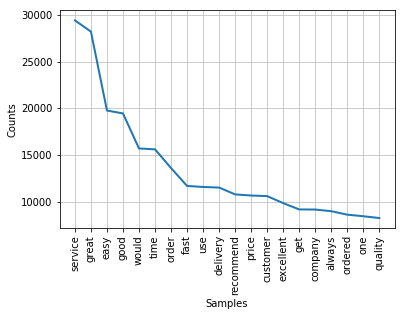

In [213]:
words = pd.Series(' '.join(df_train['text_no_stopwords']).split())
nltk.FreqDist(words).plot(20)

In [214]:
words = pd.DataFrame(words.value_counts())
words['word'] = words.index
words['count'] = words[0]
words = words.drop([0], axis = 1)

In [215]:
words[words['count'] > 10].describe()

count
count   9348.000000
mean     200.185280
std      872.413902
min       11.000000
25%       17.000000
50%       33.000000
75%       97.000000
max    29413.000000

In [220]:
words.shape

(83361, 2)

In [216]:
%%time
less_freq_words = list(words.loc[words['count'] <= 10, 'word'])

df_train['text_more_freq'] = df_train['text_no_stopwords'].apply(
    lambda x: ' '.join([x for x in x.split(' ') if x not in less_freq_words]))
# df_train['text_more_freq'][0]

KeyboardInterrupt: 

In [217]:
df_train.shape
# (129726 / 10000)*22/60

(129726, 33)

In [180]:
df_train_1 = df_train.loc[0:10000,:]
df_train_1.shape

(10001, 33)

In [181]:
%%time
less_freq_words = list(words.loc[words['count'] <= 10, 'word'])

df_train_1['text_more_freq'] = df_train_1['text_no_stopwords'].apply(
    lambda x: ' '.join([x for x in x.split(' ') if x not in less_freq_words]))

Wall time: 21min 23s


C:\Users\deepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [182]:
df_train['text_more_freq'][0]

'satisfied things unhappy vet didnt even pet dog show much attention im sure even checked teeth concerned specific problem played wasnt really listened nurse came vet respectable vet warm dogs first vet experience hoping would went little better'

In [221]:
df_train_neg = df_train.loc[df_train['flag'] == 0,:]
df_train_neg.shape

(7256, 33)

In [223]:
df_train_pos = df_train.loc[df_train['flag']== 1,:]
df_train_pos = df_train_pos.sample(n = 20000, random_state= 0)

In [224]:
df_train_us = df_train_pos.append(df_train_neg)
df_train_us.shape

(27256, 33)

In [242]:
%%time
less_freq_words = list(words.loc[words['count'] <= 10, 'word'])

df_train_us['text_more_freq'] = df_train_us['text_no_stopwords'].apply(
    lambda x: ' '.join([x for x in x.split(' ') if x not in less_freq_words]))
df_train_us['text_more_freq'][0]

Wall time: 37min 45s


In [243]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

corpus_sklearn = []
tokens = []
custom_stop_words = []

stop_words = np.hstack([common_stop_words, custom_stop_words])

from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

for doc in df_train_us['text_more_freq']:
    words = doc.split(' ')
    words_clean = [stemmer.stem(lemma.lemmatize(word)) for word in words if word not in stop_words and len(word) > 3]
    
    tokens.extend(words_clean)
    corpus_sklearn.append(' '.join(words_clean))

Wall time: 18.8 s


In [244]:
dtm_model = TfidfVectorizer()
dtm = dtm_model.fit_transform(corpus_sklearn)
df_dtm = pd.DataFrame(dtm.toarray(),
                      columns=dtm_model.get_feature_names())

In [245]:
df_train_us = df_train_us.reset_index()
df_train_us.index

RangeIndex(start=0, stop=27256, step=1)

In [246]:
df_dtm.shape

(27256, 5765)

In [247]:
df_dtm['word_count'] = df_train_us['word_count']
df_dtm['char_count'] = df_train_us['char_count']
df_dtm['avg_word_length'] = df_train_us['avg_word_length']
df_dtm['upper'] = df_train_us['upper']
df_dtm['text_lower'] = df_train_us['text_lower']
df_dtm['hashtags_count'] = df_train_us['hashtags_count']
df_dtm['flag'] = df_train_us['flag']

In [248]:
df_train_new = df_dtm

In [249]:
df_train_new.to_csv('DTM.csv')

In [ ]:
df_train_new = pd.read_csv('DTM.csv')

In [256]:
X1 = list(df_train_new.columns)
print(len(X1))
X1.remove('flag')
X1.remove('text_lower')
print(len(X1))

5770
5768


In [258]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(df_train_new[X1],
                                                        df_train_new['flag'],
                                                        stratify = df_train_new['flag'],
                                                        test_size = 0.2,
                                                        random_state = 0
                                                       )

X1_train.shape, X1_test.shape

((21804, 5768), (5452, 5768))

In [262]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, log_loss, accuracy_score

def algorithm_func(algorithm, x_train, y_train, x_test, y_test, threshold_value):
    classifier = algorithm
    classifier.fit(x_train,y_train)
    
    get_class = lambda x: 1 if x > threshold_value else 0
        
    y_pred_train = pd.DataFrame(classifier.predict_proba(x_train),                                
                                columns = ['P0','P1'])
    
    y_pred_train['Predicted'] = y_pred_train['P1'].apply(get_class)
    y_pred_train['Actual'] = y_train.values
    
    cm_train = confusion_matrix(y_pred_train['Actual'], y_pred_train['Predicted'])
    
    print('Train accuracy score:', accuracy_score(y_train.values, y_pred_train['Predicted']))
    
    ######################################################################################
    
    y_pred_test = pd.DataFrame(classifier.predict_proba(x_test),                                
                            columns = ['P0','P1'])
    
    y_pred_test['Predicted'] = y_pred_test['P1'].apply(get_class)
    y_pred_test['Actual'] = y_test.values
    
    print('Test accuracy score:', accuracy_score(y_test.values, y_pred_test['Predicted']))
    
    cm_test = confusion_matrix(y_pred_test['Actual'], y_pred_test['Predicted'])
    tn, fp, fn, tp = cm_test.ravel()
    
    import math
    
    MCC = (tp*tn - fp*fn) / math.sqrt((tp + fp)*(tp+fn)*(tn+fp)*(tn+fn))
    
    print(cm_test)
    print('MCC: ',MCC)
    
    ## ROC curve
    
    fpr, tpr, threshold = roc_curve(y_test.values,y_pred_test.iloc[:,1])
    print('auc:', auc(fpr,tpr))
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc(fpr,tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB

algorithm_func(GaussianNB(),
               X1_train,
               y1_train,
               X1_test,
               y1_test,
               0.4
              )

In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True, kernel= 'linear', class_weight= 'balanced')

svm.fit(X1_train, y1_train)
y_prob = svm.predict_proba(X1_test)
y_prob